# ECS7024 Coursework 3 Submission - Huy Quang Pham 
# English Property Price Analysis 

**Table of Content**
1. Section 1: Introduction and outline
    1. Introduction and Outline
    1. Loading the data
1. Section 2: Data Preparation (equivalent to Part 1 instructions)
    1. Separate data into *Region data* and *Area data*
    1. Mapping `region` into *Area data*
    1. Treating missing data 
1. Section 3: Region Trend Analysis (equivalent to Part 2 instructions)
    1. Comparisons among regions
    1. Comparisons between Flat and Detached prices in each region
1. Section 4: Price Changes (equivalent to Part 3 instructions)
    1. Calculating price changes
    1. Price change visualisation by Region
    1. Comment on the price change
1. Section 5: Statistical Analysis
    1. Flagging 'Increase'/'Decrease'
    1. Cross-tabulating
    1. Chi-squared test and interpretation

In [1]:
# Importing a few packages that are expected to be used
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np
import scipy.stats as stats

## Section 1: Introduction and Outline
This notebook details the process of analysing the average price of different types of properties over 36 months in different regions and areas of England, based on the data and instructions outlined in the coursework requirement.

### Section 1.A: Outline
Section 2 separates the property price data into region data and area data, adding region information for the area data, and deal with missing values. Section 3 plots the trend of the Flat and Detached prices for a better understanding of how regions differ for each type of property, and how different types of properties differ for each region. In Section 4, the changes of flat prices in different areas will be further evaluated. Finally, section 5 examines the homogeneity of the changes in flat prices among different regions.

### Section 1.B: Loading the data
Data from both source tables will be defaultly imported first for initial examination before adding column formats:

In [2]:
df = pd.read_csv("average-property-price.csv")
df_map = pd.read_csv("location-codes.csv")

print('General information and first 10 lines of data of the file "average-property-price.csv":\n')
display(df.info())
display(df.head(10))

print('\nGeneral information and first 5 lines of data of the file "location-codes.csv":\n')
display(df_map.info())
display(df_map.head(10))

General information and first 10 lines of data of the file "average-property-price.csv":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5760 non-null   object 
 1   Area      5760 non-null   object 
 2   Code      5760 non-null   object 
 3   Detached  5724 non-null   float64
 4   Semi      5724 non-null   float64
 5   Terraced  5740 non-null   float64
 6   Flat      5760 non-null   float64
dtypes: float64(4), object(3)
memory usage: 315.1+ KB


None

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
5,01/02/2017,Hartlepool,E06000001,172963.8263,103101.0761,72833.96040,59591.26472
6,01/03/2017,Hartlepool,E06000001,172013.2461,102520.2833,72261.07142,59212.90760
7,01/04/2017,Hartlepool,E06000001,174921.1234,104315.3747,73702.23260,60425.80637
8,01/05/2017,Hartlepool,E06000001,182808.4028,109570.9244,77281.31390,63455.60485
9,01/06/2017,Hartlepool,E06000001,182850.5209,109947.0048,77773.13434,63612.01761



General information and first 5 lines of data of the file "location-codes.csv":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AuthorityCode  154 non-null    object
 1   AuthorityName  154 non-null    object
 2   RegionCode     154 non-null    object
 3   RegionName     154 non-null    object
dtypes: object(4)
memory usage: 4.9+ KB


None

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
5,E06000006,Halton,E12000002,North West
6,E06000007,Warrington,E12000002,North West
7,E06000008,Blackburn with Darwen,E12000002,North West
8,E06000009,Blackpool,E12000002,North West
9,E06000010,"Kingston upon Hull, City of",E12000003,Yorkshire and The Humber


For average prices file, columns `Date`, `Area` and `Code` are currently set as datatype 'object'. The data in `Date` column will be re-set to 'datetime' type. `Area` and `Code` will be re-set to 'category' type.

For location code file, all 4 columns (`AuthorityCode`, `AuthorityName`, `RegionCode`, `RegionName`) should and will be re-set to 'category' type (currently all are 'object').

In [3]:
#average-property-price.csv

#set up a dictionary with data type for each column
types_dict = {'Area': 'category', 'Code': 'category'}
#import data, setting 'Date' column as datetime, and categorical columns
df = pd.read_csv("average-property-price.csv", 
                 dtype = types_dict, 
                 parse_dates = ['Date'],
                 dayfirst=True
                )
#retrieve info() and head()
print('General information and first 10 lines of data of the file',
      '"average-property-price.csv" after re-setting datatypes:\n')
display(df.info())
df.head(10)

General information and first 10 lines of data of the file "average-property-price.csv" after re-setting datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5760 non-null   datetime64[ns]
 1   Area      5760 non-null   category      
 2   Code      5760 non-null   category      
 3   Detached  5724 non-null   float64       
 4   Semi      5724 non-null   float64       
 5   Terraced  5740 non-null   float64       
 6   Flat      5760 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(4)
memory usage: 254.2 KB


None

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,2016-09-01,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,2016-10-01,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,2016-11-01,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,2016-12-01,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,2017-01-01,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
5,2017-02-01,Hartlepool,E06000001,172963.8263,103101.0761,72833.96040,59591.26472
6,2017-03-01,Hartlepool,E06000001,172013.2461,102520.2833,72261.07142,59212.90760
7,2017-04-01,Hartlepool,E06000001,174921.1234,104315.3747,73702.23260,60425.80637
8,2017-05-01,Hartlepool,E06000001,182808.4028,109570.9244,77281.31390,63455.60485
9,2017-06-01,Hartlepool,E06000001,182850.5209,109947.0048,77773.13434,63612.01761


In [4]:
#location-codes.csv

#set up a dictionary with data type for each column
types_dict = {'AuthorityCode': 'category', 'AuthorityName': 'category', 
              'RegionCode': 'category', 'RegionName': 'category'}
#import data, setting categorical columns
df_map = pd.read_csv("location-codes.csv", dtype = types_dict)

#retrieve info() and head()
print('General information and first 10 lines of data of the file',
      '"location-codes.csv" after re-setting datatypes:\n')

display(df_map.info())   
df_map.head(10)

General information and first 10 lines of data of the file "location-codes.csv" after re-setting datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AuthorityCode  154 non-null    category
 1   AuthorityName  154 non-null    category
 2   RegionCode     154 non-null    category
 3   RegionName     154 non-null    category
dtypes: category(4)
memory usage: 8.2 KB


None

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
5,E06000006,Halton,E12000002,North West
6,E06000007,Warrington,E12000002,North West
7,E06000008,Blackburn with Darwen,E12000002,North West
8,E06000009,Blackpool,E12000002,North West
9,E06000010,"Kingston upon Hull, City of",E12000003,Yorkshire and The Humber


## Section 2: Data preparation (Calculating new variables) 

### Section 2.A: Separate region and area data

As stated in the requirement, the current prices data consists of both area and region prices. This will be separated using the prefix 'E12' in column `Code`, splitting the given table into 2: a *Region table* and an *Area table*.

In [5]:
#assign rows with code starting with 'E12' to a dataframe with just regions
df_regions = df.loc[df["Code"].str.startswith('E12')]
#assign rows with code NOT starting with 'E12' to a dataframe with just areas
df_areas = df.loc[~df["Code"].str.startswith('E12')]
#print shape() and head() of both to check
print('Shape and first 5 lines of regions data')
display(df_regions.shape)
display(df_regions.head(5))
print('Shape and first 5 lines of area data')
display(df_areas.shape)
display(df_areas.head(5))

Shape and first 5 lines of regions data


(324, 7)

,Date,Area,Code,Detached,Semi,Terraced,Flat
5436,2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
5437,2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
5438,2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
5439,2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
5440,2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214


Shape and first 5 lines of area data


(5436, 7)

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,2016-09-01,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,2016-10-01,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,2016-11-01,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,2016-12-01,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,2017-01-01,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795


### Section 2.B: Mapping regions·into area data

This is done by looking up the region for each area using Code as the  look-up value in the mapping table.

In [6]:
#create a table with just 'AuthorityCode' and 'RegionName'
df_map_join = df_map.loc[:,['AuthorityCode', 'RegionName']].set_index('AuthorityCode')
#join Area table with the created table
df_areas_w_region = df_areas.join(df_map_join, on="Code", how="left")
df_areas_w_region

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionName
0,2016-09-01,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,North East
1,2016-10-01,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,North East
2,2016-11-01,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,North East
3,2016-12-01,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,North East
4,2017-01-01,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,North East
...,...,...,...,...,...,...,...,...
5431,2019-04-01,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,West Midlands
5432,2019-05-01,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,West Midlands
5433,2019-06-01,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,West Midlands
5434,2019-07-01,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,West Midlands


Some simple checks are carried out to ensure the mapping was executed correctly. A table with distinct values of Area and Region will be created from the table above. Then 2 tables will be displayed: 1 with all rows with missing value in `RegionName` column; the 2nd with a random area check to see if that area is wrongly mapped with a different region.

As seen from the results below, there are no rows with missing Region Name, and the Region for the randomly chosen input Area matches with the mapping table.

In [7]:
areas_regions = df_areas_w_region.loc[:, ['Area', 'RegionName']].drop_duplicates()
#show all rows with NULL RegionName
NaN_region = areas_regions.RegionName.isnull() 
NaN_region_rows = areas_regions[NaN_region]
print('All rows with NULL RegionName')
display(NaN_region_rows)
#random check of one area
Area_check = 'York'
print('Cross-checking the following Area:', Area_check)
display(areas_regions.loc[areas_regions.Area==Area_check])
#cross-check with mapping data
display(df_map.loc[df_map.AuthorityName==Area_check])

All rows with NULL RegionName


,Area,RegionName


Cross-checking the following Area: York


,Area,RegionName
468,York,Yorkshire and The Humber


,AuthorityCode,AuthorityName,RegionCode,RegionName
13,E06000014,York,E12000003,Yorkshire and The Humber


### Section 2.C: Missing data treatment
First the rows from the original table with missing data are identified:

In [8]:
row_has_NaN = df.isnull().any(axis=1)
rows_with_NaN = df[row_has_NaN]
display(rows_with_NaN['Code'].unique())
#display all
display(rows_with_NaN.shape)
rows_with_NaN

['E09000001']
Categories (1, object): ['E09000001']

(36, 7)

,Date,Area,Code,Detached,Semi,Terraced,Flat
3276,2016-09-01,City of London,E09000001,NaN,NaN,1189233.714,777891.9778
3277,2016-10-01,City of London,E09000001,NaN,NaN,1195010.116,790055.2118
3278,2016-11-01,City of London,E09000001,NaN,NaN,1229507.612,815992.8991
3279,2016-12-01,City of London,E09000001,NaN,NaN,1217012.801,809149.8515
3280,2017-01-01,City of London,E09000001,NaN,NaN,1227434.570,817654.0898
3281,2017-02-01,City of London,E09000001,NaN,NaN,1189660.065,818093.5200
3282,2017-03-01,City of London,E09000001,NaN,NaN,1176573.144,851416.0699
3283,2017-04-01,City of London,E09000001,NaN,NaN,1238739.417,903551.8492
3284,2017-05-01,City of London,E09000001,NaN,NaN,1277795.874,937307.4240
3285,2017-06-01,City of London,E09000001,NaN,NaN,1174213.336,928316.5022


The only rows with missing data are that of City of London. All 36 entries of City of London Detached and Semi-detached property prices over 36 months are missing, while 20 of 36 entries of Terraced are missing. This means **only the `Area` data *is affected*, not the `Region` data.**

There are multiple ways of dealing with this type of missing data: 
For Detached and Semi-detached prices, as there are no data at any timestamps whatsoever, missing data can be inferred from the 'London' region's average (just using London's prices as City of London prices, calculating London's Detached and Semi-detached prices as a percentage of London's flat prices and multiplying that percentage with Flat's prices of City of London, assuming a constant rate for all regions of London, etc.)

For Terraced property, missing data can be inferred using the last available month's price and the changing rate of that of London's.

**However, as the analysis by Area only require flat prices, which does not have missing data, these treatment are redundant as carrying it out will not affect the analysis. Therefore, the missing data will not be treated.**

## Section 3: Region Trend Analysis (equivalent to Part 2 instructions)

### Section 3.A: Comparing Property among Regions

First we look at the trend of the prices for Flats and Detached properties in different regions, by creating a table and visualizing it:

In [9]:
#constructing the table with Date as index and regions and propety types as columns 
region_summary_by_type = df_regions.set_index(['Date', 'Area']).iloc[:,[1,4]].unstack() 
region_summary_by_type

Detached                                                      \
Area         North East   North West Yorkshire and The Humber East Midlands   
Date                                                                          
2016-09-01  208117.1739  258657.9184              241975.9618   253192.5738   
2016-10-01  208519.1158  257093.7678              242695.6641   253113.5644   
2016-11-01  210555.4948  259290.4851              245728.3337   256399.0387   
2016-12-01  211728.7243  258008.8847              246480.2363   256072.6841   
2017-01-01  205942.7099  258860.3637              241975.4125   254846.8515   
2017-02-01  209000.7787  260254.7932              242962.8627   256861.6541   
2017-03-01  206299.9682  259462.3536              242610.4487   257481.8619   
2017-04-01  209870.7827  263377.9298              248126.6759   261248.1976   
2017-05-01  211397.5399  262220.8090              247651.9871   260872.7607   
2017-06-01  213336.1112  264521.6462              249785.6485   263246.1218   
2017-07-01  214051.0282  268174.5287              251379.6290   267286.9730   
2017-08-01  216338.8321  270465.5135              253604.0438   266169.0857   
2017-09-01  214284.6318  271528.1946              255034.3345   269062.1441   
2017-10-01  214974.9746  270965.5336              253559.0799   269852.0302   
2017-11-01  212154.5648  271135.0198              253394.2906   268777.9896   
2017-12-01  217537.8668  271632.9878              254799.5279   270134.1521   
2018-01-01  208506.5303  268066.4232              251918.2313   270216.5829   
2018-02-01  214013.1189  271846.8870              251963.3111   274416.2360   
2018-03-01  207564.0721  269033.1806              252212.0386   271045.0959   
2018-04-01  215047.1083  271355.9592              253579.4479   274048.1110   
2018-05-01  215873.4659  272144.8581              257304.7309   276019.5500   
2018-06-01  212794.8132  274551.0072              258059.2462   276373.1427   
2018-07-01  220862.1096  279842.5321              261424.3673   280767.4566   
2018-08-01  218521.2327  280375.1030              264071.7517   281373.1489   
2018-09-01  218330.4674  281333.0167              262057.9766   284612.8539   
2018-10-01  219675.0863  282465.5763              261793.3355   281460.9497   
2018-11-01  215532.1168  281299.7072              261561.5944   283085.5363   
2018-12-01  215263.2674  279481.2121              261435.5380   280330.0645   
2019-01-01  212453.2659  279624.3828              261217.8087   282615.9016   
2019-02-01  210784.7297  279926.4979              258450.7845   280984.7861   
2019-03-01  209280.7973  277198.3406              259514.2726   279292.7028   
2019-04-01  216860.6349  279958.0808              261924.2783   280967.8701   
2019-05-01  214486.9099  281806.0831              261778.7529   280503.5740   
2019-06-01  217216.8158  281419.2632              264474.9522   282678.2411   
2019-07-01  219350.6186  285459.4854              266174.1596   284056.5330   
2019-08-01  227538.4597  293777.8228              269545.8972   291211.1744   

                                                                           \
Area       West Midlands Region East of England       London   South East   
Date                                                                        
2016-09-01          293131.3321     405841.8655  883706.1247  527197.4444   
2016-10-01          291204.5534     406573.8362  883336.1414  528135.7832   
2016-11-01          295637.5125     408206.6914  886552.8418  531277.2444   
2016-12-01          294605.1742     411744.8900  887004.7033  530752.5402   
2017-01-01          294141.4508     410560.0190  893279.1773  537855.6757   
2017-02-01          294116.9249     411944.6695  887958.7840  529118.8580   
2017-03-01          295564.0449     411211.1664  893858.7342  533570.9350   
2017-04-01          297490.4605     416558.8181  899132.7916  538673.2864   
2017-05-01          297428.8104     417077.1037  890430.0883  534449.8795   
2017-06-0

Using this table, 2 line graphs can be plotted to examine the trend of Flat and Detached prices for each regions:

[None, None]

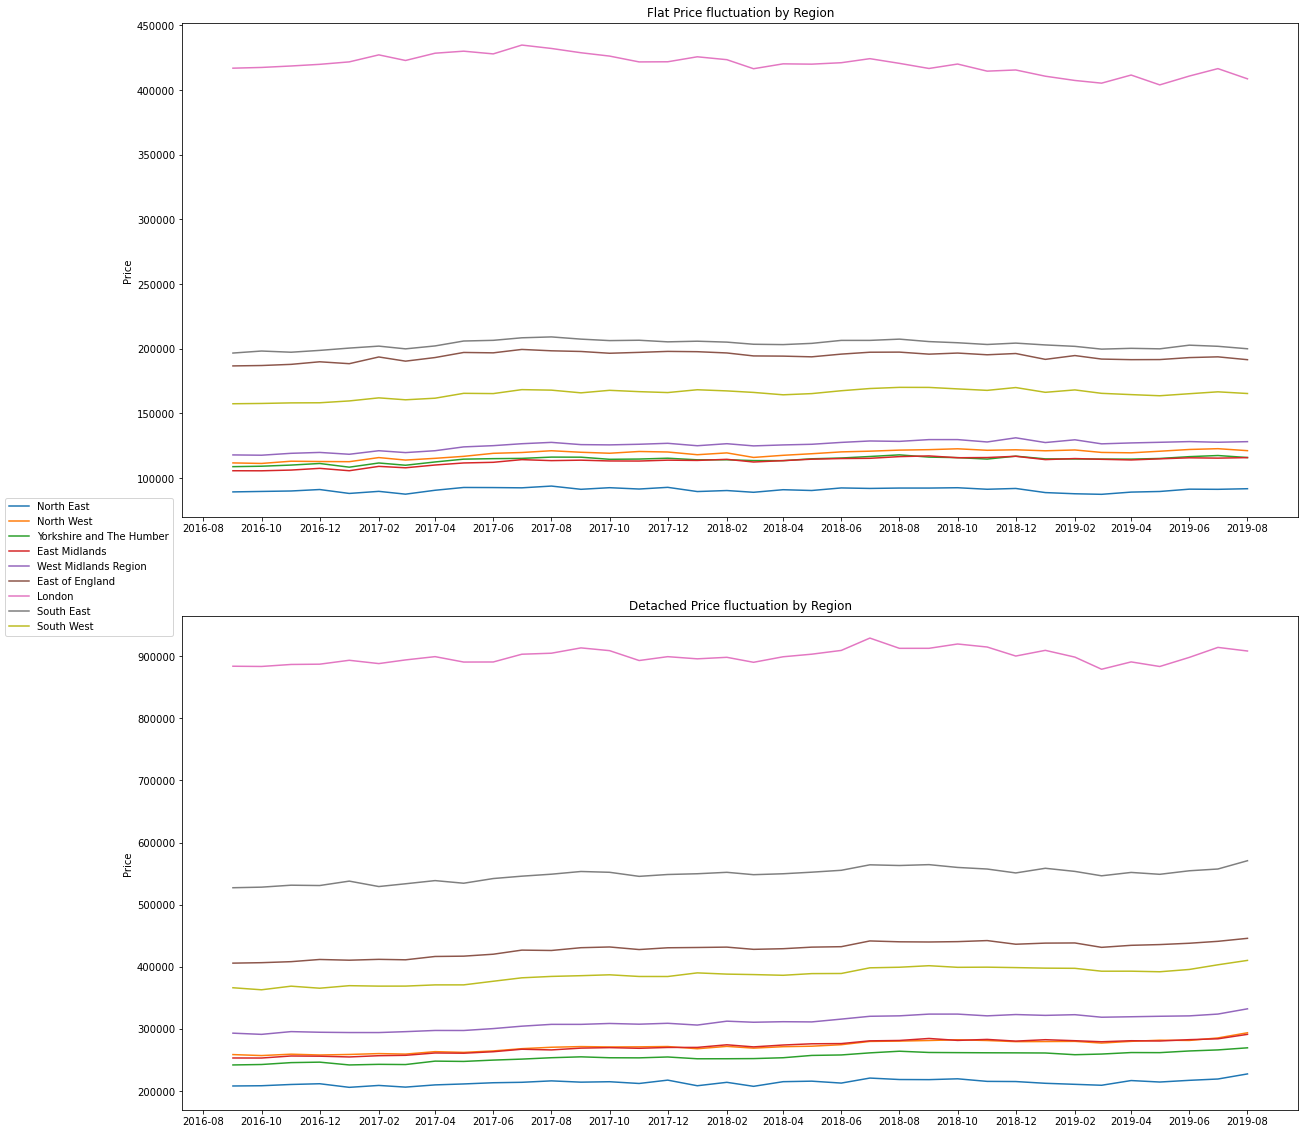

In [10]:
#creating a list of all regions for shorter code
region_list = region_summary_by_type['Flat'].columns.to_list()
#Plotting 2 line graphs of each property type for analysis
fig, (a1, a2) = plt.subplots(2,1, figsize=(20,20))

#Graph 1: FLat prices
[a1.plot(region_summary_by_type.Flat.loc[:, region], 
         label=region) for region in region_list]
#Graph 2: Detached prices
[a2.plot(region_summary_by_type.Detached.loc[:, region], 
        ) for region in region_list]

# Make the plots a bit clearer
a1.set_title('Flat Price fluctuation by Region')
a2.set_title('Detached Price fluctuation by Region')
[a.set_ylabel('Price') for a in [a1, a2]]
fig.legend(loc='center left') 

fmt_quarter = mdates.MonthLocator(interval=2)
[a.xaxis.set_major_locator(fmt_quarter) for a in [a1, a2]]

Both these graphs clearly show fairly steady trends in average prices in both types of property. While the majority of the regions' *Detached prices* were witnessing a slight increase, *Flat prices* seem to remain at a similar level throughout the 36-month period.

The ranking for prices were consistent between Flats and Detached house, with London by far the most expensive region to buy either types (Flat prices are more than 2 times that of the second highest, and Detached house prices amost 2 times that of the second highest), followed by the South East and the East of England, while the North East region the least expensive. 

We also witnessed minimal fluctuation over the 36-month period. London's prices for both types of properties looks to be the most volatile. Prices in other regions do not fluctuate as significantly. There also seems to be a cyclical effect on Flat prices at the beginning of the year (December-January) where the prices drop ever so slightly, but again this does not apply to that of London.

### Section 3.C: Comparing Detached vs Flat prices for each region 

We move on to look at prices of 2 different property types of each region, also by creating a table and vizualizing it.

In [11]:
#constructing the table with Date as index and propety types for each region as columns 
region_summary = region_summary_by_type.swaplevel(0,1,axis = 1).sort_index(axis=1, level=0)
region_summary

Area       East Midlands              East of England               \
                Detached         Flat        Detached         Flat   
Date                                                                 
2016-09-01   253192.5738  105719.7658     405841.8655  186766.3869   
2016-10-01   253113.5644  105677.9102     406573.8362  187073.2483   
2016-11-01   256399.0387  106242.3931     408206.6914  187968.8368   
2016-12-01   256072.6841  107565.5240     411744.8900  189962.0231   
2017-01-01   254846.8515  105732.0816     410560.0190  188491.7502   
2017-02-01   256861.6541  109102.8966     411944.6695  193682.8503   
2017-03-01   257481.8619  108001.4682     411211.1664  190450.5708   
2017-04-01   261248.1976  110155.1760     416558.8181  193239.5754   
2017-05-01   260872.7607  111737.3001     417077.1037  197168.2053   
2017-06-01   263246.1218  112241.7427     420192.1848  196876.7332   
2017-07-01   267286.9730  114314.3701     426795.2575  199512.8227   
2017-08-01   266169.0857  113538.0488     426207.5916  198454.3204   
2017-09-01   269062.1441  113888.5426     430677.4226  197934.7562   
2017-10-01   269852.0302  113284.7995     431851.8499  196556.6073   
2017-11-01   268777.9896  113217.2564     427708.1045  197239.4959   
2017-12-01   270134.1521  113899.7086     430565.6344  197989.9749   
2018-01-01   270216.5829  113694.9082     431026.3378  197758.6992   
2018-02-01   274416.2360  114547.3943     431617.6938  196786.7546   
2018-03-01   271045.0959  112470.0523     428036.6449  194486.9164   
2018-04-01   274048.1110  113536.4671     429060.5628  194338.2140   
2018-05-01   276019.5500  114652.1942     431591.4065  193791.0018   
2018-06-01   276373.1427  115153.0211     432315.1445  195891.3521   
2018-07-01   280767.4566  115329.6930     441560.6958  197352.0237   
2018-08-01   281373.1489  116638.2418     440176.1938  197436.5013   
2018-09-01   284612.8539  117184.8693     439876.9793  195858.9238   
2018-10-01   281460.9497  115774.8574     440448.4786  196709.4300   
2018-11-01   283085.5363  115931.3817     442142.6773  195377.3665   
2018-12-01   280330.0645  116890.6906     436271.2173  196354.3201   
2019-01-01   282615.9016  114322.3485     438068.7261  191830.4722   
2019-02-01   280984.7861  115143.2700     438321.4488  194771.3855   
2019-03-01   279292.7028  114567.2025     431251.6982  192061.3353   
2019-04-01   280967.8701  114064.8932     434516.6954  191599.8008   
2019-05-01   280503.5740  114930.5018     435713.7590  191677.2548   
2019-06-01   282678.2411  115726.1378     437854.2812  193206.3429   
2019-07-01   284056.5330  115469.6747     440948.7566  193780.2477   
2019-08-01   291211.1744  115872.7194     445761.2287  191576.7882   

Area             London                North East                North West  \
               Detached         Flat     Detached         Flat     Detached   
Date                                                                          
2016-09-01  883706.1247  416967.2409  208117.1739  89361.51412  258657.9184   
2016-10-01  883336.1414  417531.8233  208519.1158  89716.48508  257093.7678   
2016-11-01  886552.8418  418659.5180  210555.4948  90065.71739  259290.4851   
2016-12-01  887004.7033  419936.6675  211728.7243  91195.50119  258008.8847   
2017-01-01  893279.1773  421833.8474  205942.7099  88170.43214  258860.3637   
2017-02-01  887958.7840  427256.1776  209000.7787  89782.91557  260254.7932   
2017-03-01  893858.7342  422917.3012  206299.9682  87609.58205  259462.3536   
2017-04-01  899132.7916  428540.6399  209870.7827  90626.48016  263377.9298   
2017-05-01  890430.0883  430110.5328  211397.5399  92787.58634  262220.8090   
2017-06-01  890539.0466  428000.7674  213336.1112  92709.87908  264521.6462   
2017-07-01  903022.8615  434837.0360  214051.0282  92513.62996  268174.5287   
2017-08-01  904654.7593  432209.4435  216338.8321  93868.42142  270465.5135   
2017-09-01  913219.9231  428891.9064  214284.6318  91370.56280  271528.1946   
2017-

[None, None, None, None, None, None, None, None, None]

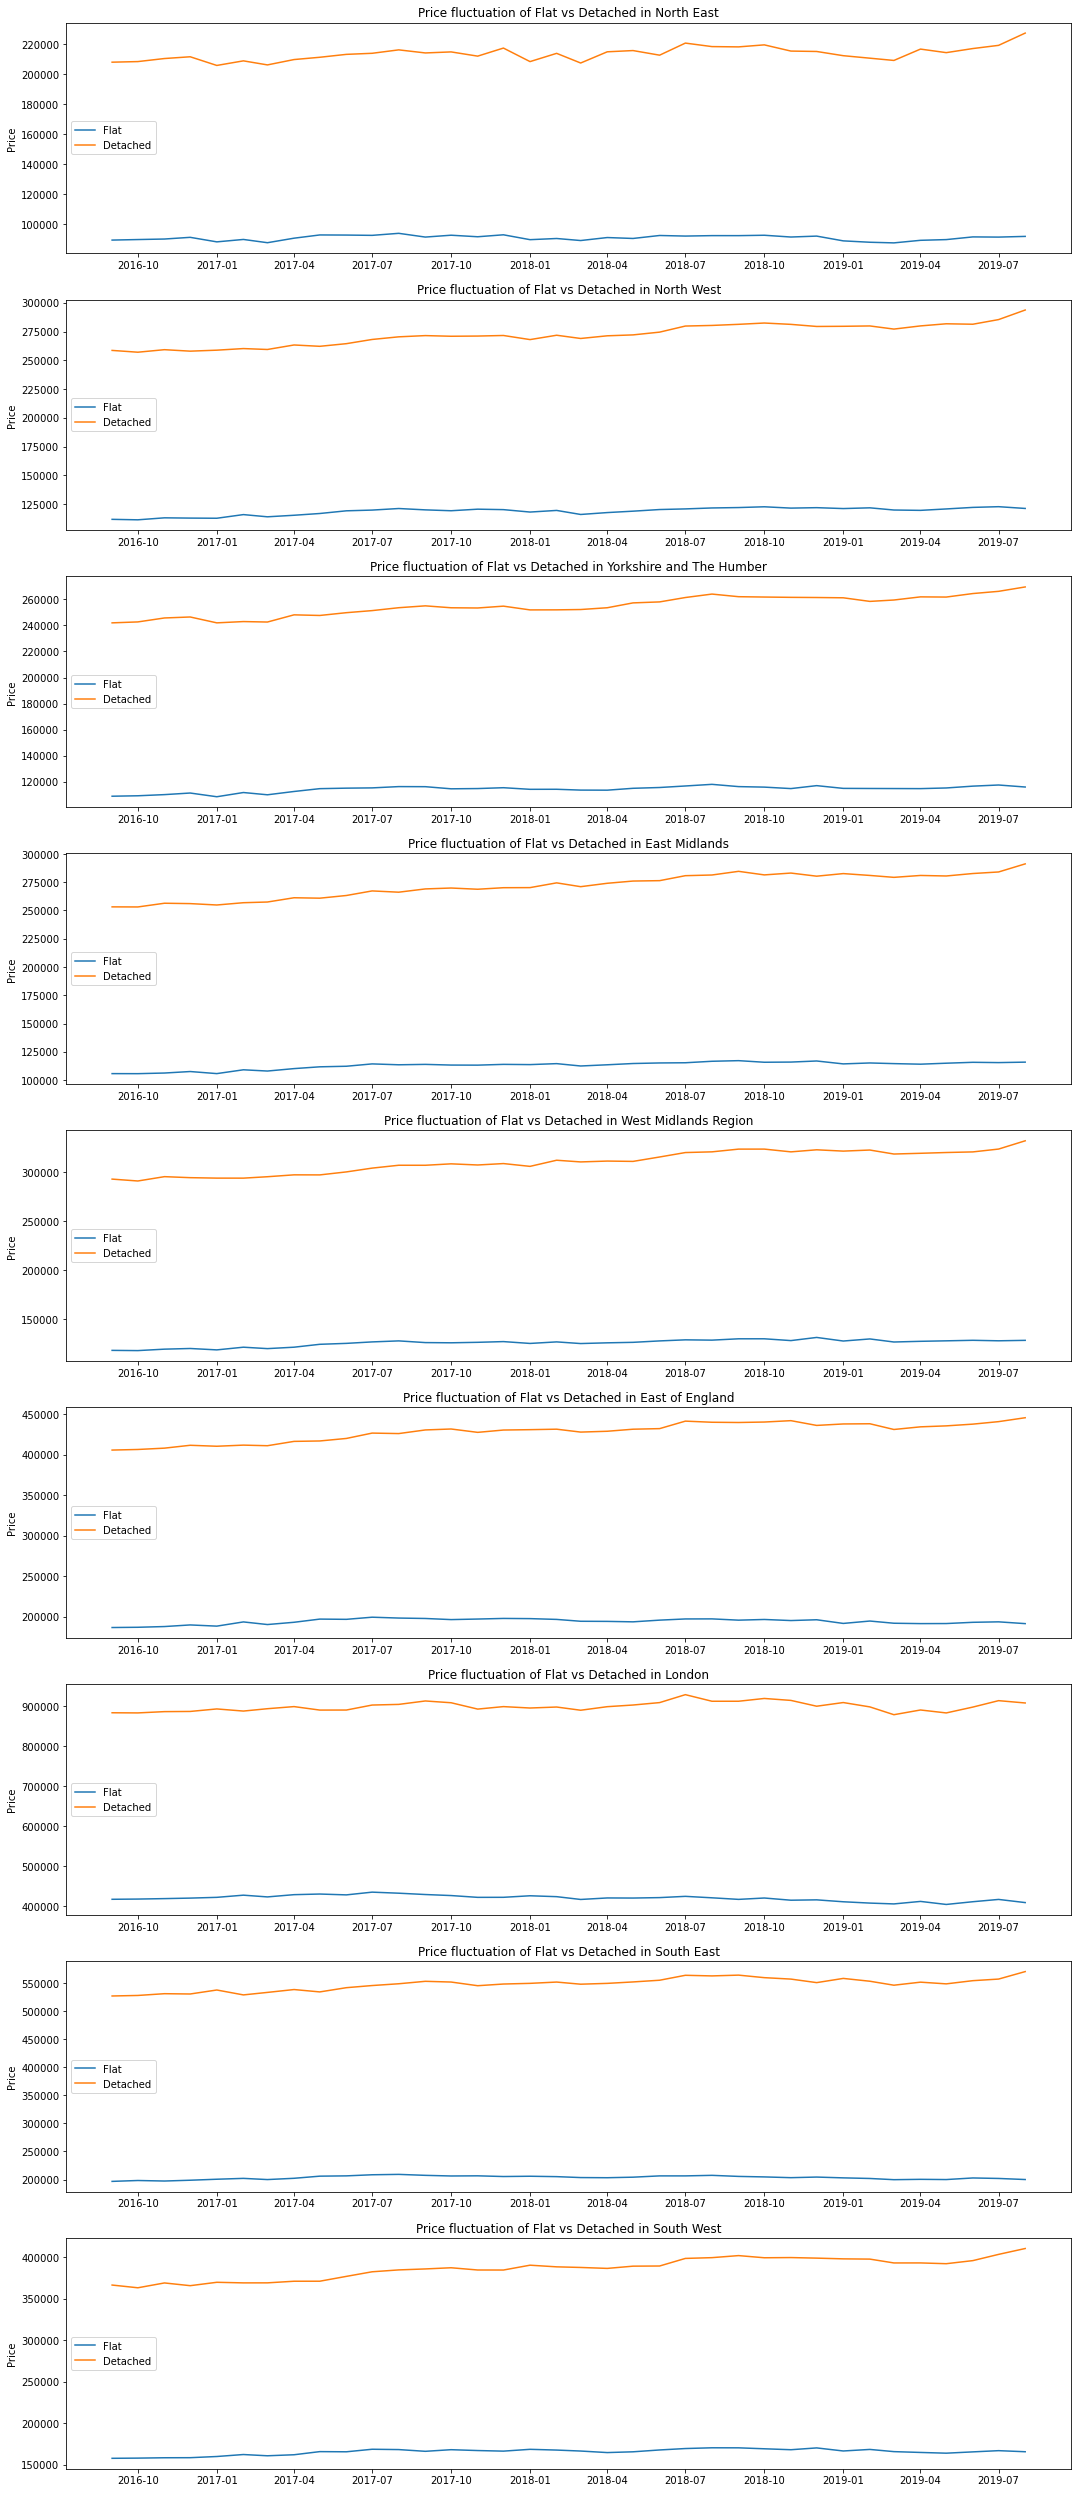

In [12]:
#Plotting 9 line graphs of each property type for analysis
fig, (a1, a2, a3, a4, a5, a6, a7, a8, a9) = plt.subplots(9,1, figsize=(18,45))
charts = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
[a.plot(region_summary[b].loc[:, 'Flat'],
        label='Flat') for a, b in zip(charts, region_list)]
[a.plot(region_summary[b].loc[:, 'Detached'],
        label='Detached') for a, b in zip(charts, region_list)]

# Make the plots a bit clearer
fig.suptitle('')
[a.set_title('Price fluctuation of Flat vs Detached in ' + b) for a, b in zip(charts, region_list)]
[a.set_ylabel('Price') for a in charts]
[a.legend(loc="center left") for a in charts]

fmt_quarter = mdates.MonthLocator(interval=3)
[a.xaxis.set_major_locator(fmt_quarter) for a in charts]


Plotting each region separately clearly demonstrates an upward trend of average Detached house prices over the 36-month period, while Flat price remained stagnant. Every region's average price for Detached houses are more than **twice** as expensive as that region's flat prices.

## Section 4: Price Changes

### Section 4.A: Price change data preparation

Data will be prepared by deducting the price of each Area in July 2018 by that of July 2017.

In [13]:
#get just 2 dates of July and setting index for easier calculation
price_2017 = df_areas_w_region.loc[(df_areas_w_region['Date']=='2017-07-01'),  
                                   ['Code', 'Flat']].set_index('Code')
price_2018 = df_areas_w_region.loc[(df_areas_w_region['Date']=='2018-07-01'),  
                                   ['Code', 'Flat']].set_index('Code')
price_change = price_2018 - price_2017
#create a table with distinct areas and regions 
area_w_region_distinct = df_areas_w_region.loc[:, ['Area', 'Code', 'RegionName']].drop_duplicates() 
#Insert a new column to capture this calculation by joining the 2 tables
flat_price_change = area_w_region_distinct.join(price_change, on="Code", how="left", rsuffix='_change')
#reset index so it goes back to the original dataframe
flat_price_change

,Area,Code,RegionName,Flat
0,Hartlepool,E06000001,North East,-3891.02012
36,Middlesbrough,E06000002,North East,150.83825
72,Redcar and Cleveland,E06000003,North East,-705.01266
108,Stockton-on-Tees,E06000004,North East,55.22466
144,Darlington,E06000005,North East,-3362.06155
...,...,...,...,...
5256,Suffolk,E10000029,East of England,2210.28110
5292,Surrey,E10000030,South East,-2971.83510
5328,Warwickshire,E10000031,West Midlands,1793.77060
5364,West Sussex,E10000032,South East,-1711.65960


In [14]:
flat_price_change.pivot_table(index='RegionName', values='Area', aggfunc='count')

,Area
RegionName,
East Midlands,9
East of England,11
London,33
North East,12
North West,23
South East,19
South West,15
West Midlands,14
Yorkshire and The Humber,15


### Section 4.B: Visualisation of price changes by Region

Bar charts and histograms will be used to illustrate the price changes between July 2017 and July 2018 in different regions. 

[Text(0.5, 1.0, 'Flat Price changes in Areas of North East'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of North West'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of Yorkshire and The Humber'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of East Midlands'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of West Midlands'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of South West'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of East of England'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of South East'),
 Text(0.5, 1.0, 'Flat Price changes in Areas of London')]

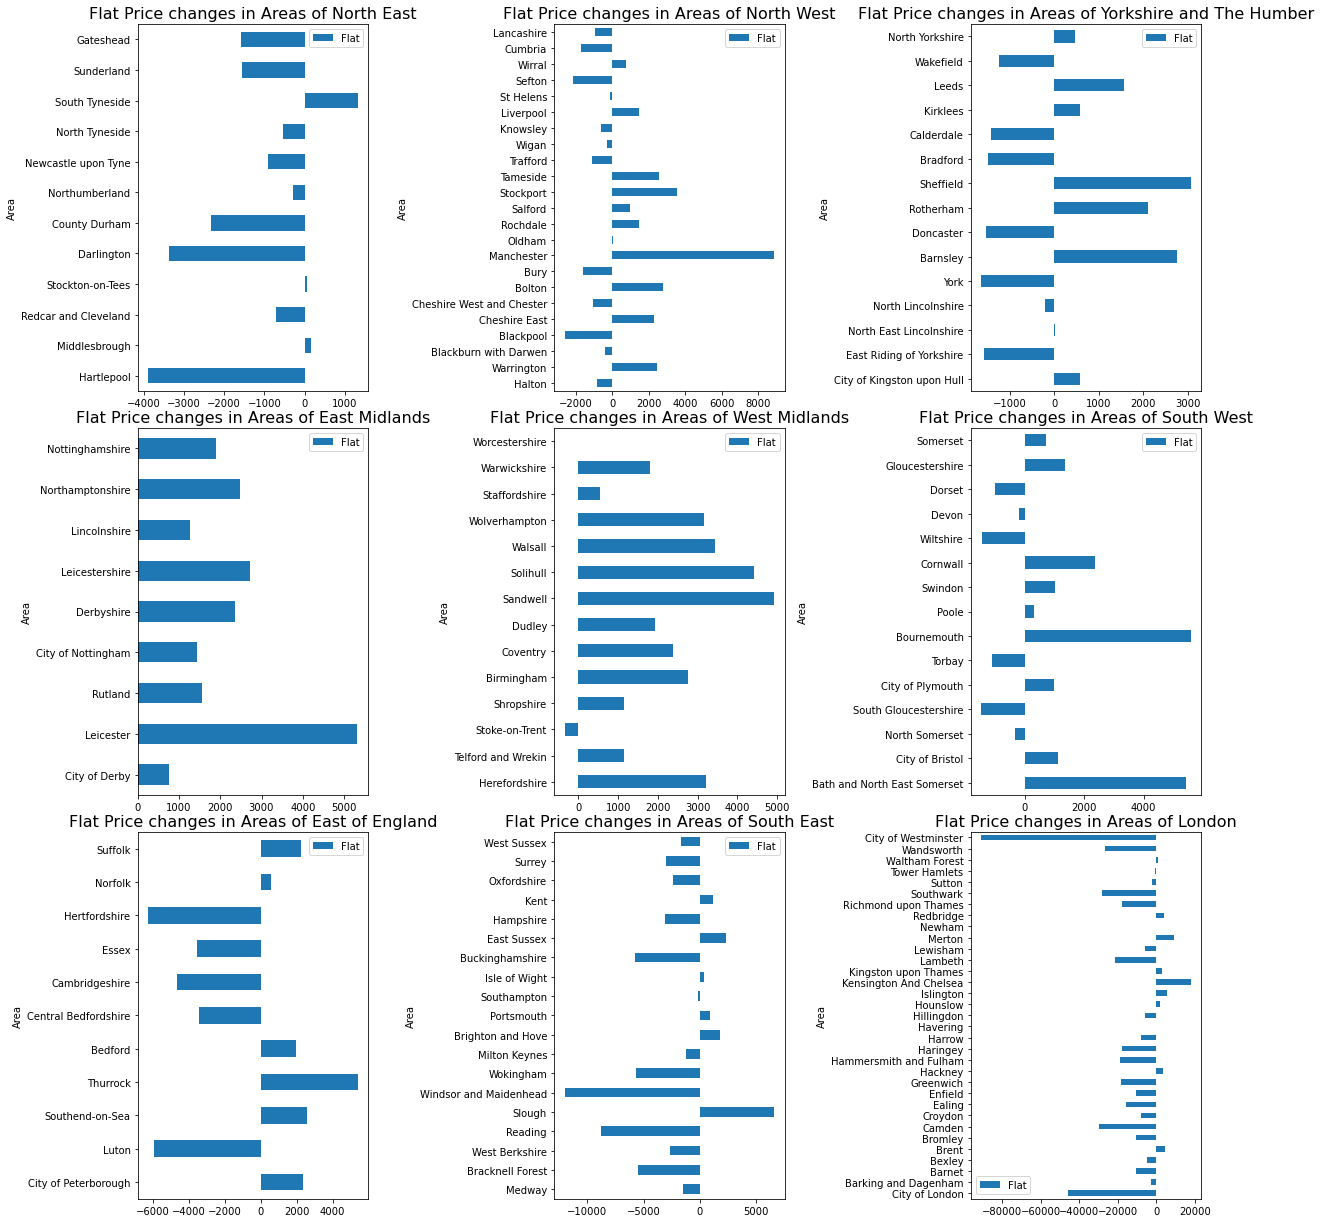

In [15]:
#create a list for shorter coding
region_list = flat_price_change['RegionName'].drop_duplicates()
#Plotting 9 line graphs of each property type for analysis
fig, ((a1, a2, a3), (a4, a5, a6), (a7, a8, a9)) = plt.subplots(3,3, figsize=(17,17))
charts = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
[flat_price_change.loc[flat_price_change.RegionName==b].plot(kind='barh'
                                                         , x='Area', 
                                                         y='Flat'
                                                         , ax=a) for a, b in zip(charts, 
                                                                                 region_list)]

# Make the plots a bit clearer
fig.suptitle('')
fig.tight_layout(h_pad=2, w_pad=1)
[a.set_title('Flat Price changes in Areas of ' + b, fontsize=16) for a, b in zip(charts, region_list)]


array([[<AxesSubplot:title={'center':'East Midlands'}>,
        <AxesSubplot:title={'center':'East of England'}>,
        <AxesSubplot:title={'center':'London'}>],
       [<AxesSubplot:title={'center':'North East'}>,
        <AxesSubplot:title={'center':'North West'}>,
        <AxesSubplot:title={'center':'South East'}>],
       [<AxesSubplot:title={'center':'South West'}>,
        <AxesSubplot:title={'center':'West Midlands'}>,
        <AxesSubplot:title={'center':'Yorkshire and The Humber'}>]],
      dtype=object)

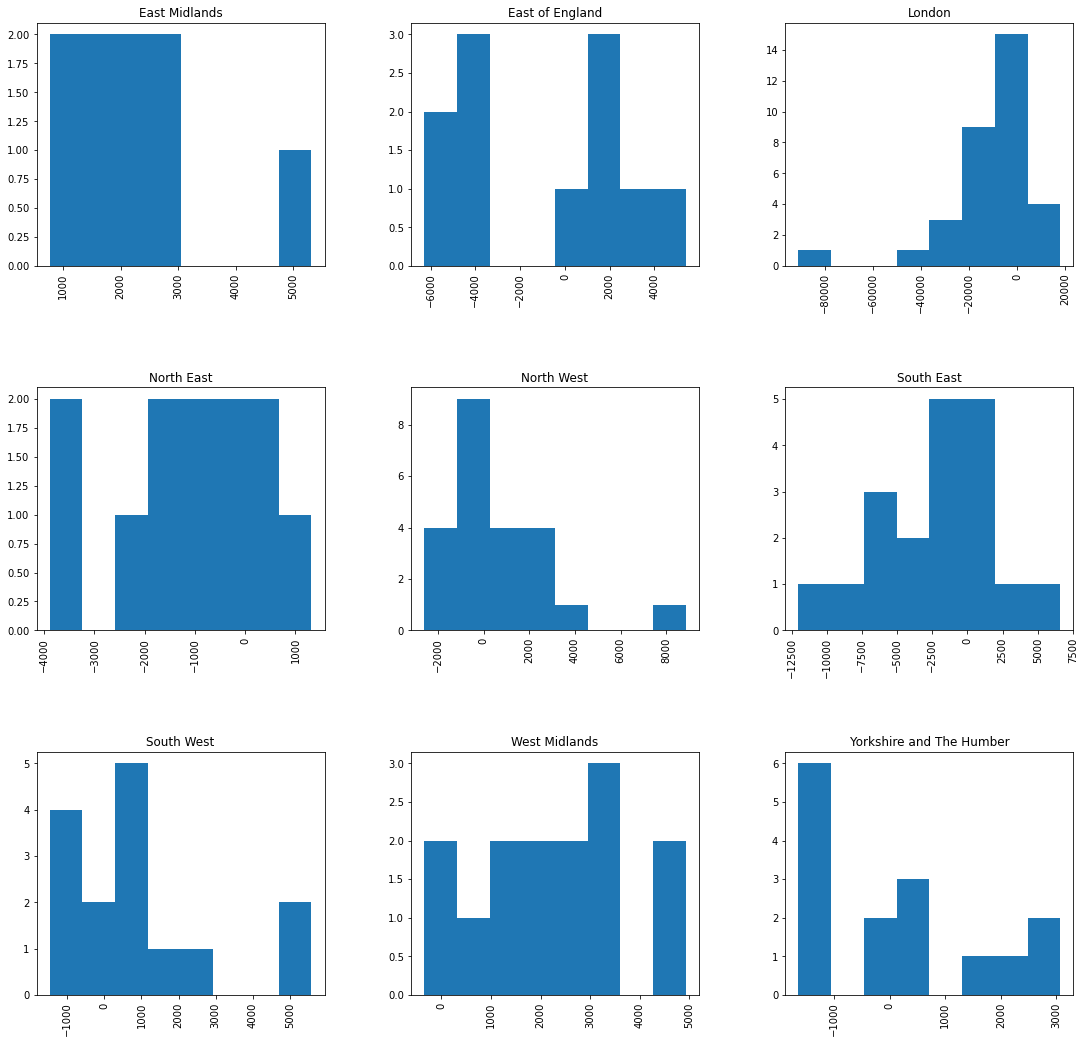

In [16]:
flat_price_change.hist(bins=8, column='Flat', by='RegionName', figsize = (18,18))

### Section 4.C: Comments on the price changes by Region

It is clear that there are regions with more areas having increases in Flat price from July 2017 to July 2018. For instance, the West Midlands and East Midlands regions have almost all Areas with increased flat prices (only 1 out of 23 areas had a decrease in price). 

In contrast, regions like North East, South East and London experienced a large proportion of Areas with decreased prices, and those decreased actually decreased by considerably larger values than those area that increased.

Other areas saw a mixed variety of price adjustments.

Based on this data, London is considered to have had the worst year with regards to prices of real estate - specifically flats, while the Midlands regions have experienced a thriving period.

## Section 5: Statistical Analysis
### Section 5.A: Flagging Increase/Decrease

In order to create the cross-tabulation, we will first need to flag each `Area` as 'Increase' or 'Decrease' based on the price change values calculated in Section 4.1. 

In [17]:
#create a function to classify each row to be 'Increase' or 'Decrease' based on a given value
def price_flag(i):
    if i >=0:
        return 'Increase'
    else:
        return 'Decrease'

#applying that function to the current table using the pricve difference value
flat_price_change['Flag'] = flat_price_change.apply(lambda x: price_flag(x.Flat), axis=1)
flat_price_change

,Area,Code,RegionName,Flat,Flag
0,Hartlepool,E06000001,North East,-3891.02012,Decrease
36,Middlesbrough,E06000002,North East,150.83825,Increase
72,Redcar and Cleveland,E06000003,North East,-705.01266,Decrease
108,Stockton-on-Tees,E06000004,North East,55.22466,Increase
144,Darlington,E06000005,North East,-3362.06155,Decrease
...,...,...,...,...,...
5256,Suffolk,E10000029,East of England,2210.28110,Increase
5292,Surrey,E10000030,South East,-2971.83510,Decrease
5328,Warwickshire,E10000031,West Midlands,1793.77060,Increase
5364,West Sussex,E10000032,South East,-1711.65960,Decrease


### Section 5.B: Creating a Cross-tabulation
This can be done using a pivot table and counting the number of observations:

In [18]:
cross_tab = flat_price_change.pivot_table(index='Flag', columns='RegionName'
                                          , values='Area', aggfunc='count')
cross_tab

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Flag,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### Section 5.C: Chi-squared Test
This test will be used to test the difference between observed and expected frequencies of a cross-tabulation. 

The null hypothesis is that there is no difference in Increase / Decrease frequency between different regions. 

In [19]:
test_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))


There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


The P-value above indicates a statistically significant difference between Regions, therefore we reject the null, which means there are statistical evidence that regions differ in terms of increase/decrease frequencies.

Below displays the expected frequency if regions were to have the same number of areas increasing/decreasing, followed by ther actual observed data, and the difference between the observed data and expected frequency.

In [20]:
display(pd.DataFrame(expected))
display(cross_tab)
cross_tab - expected.round(1)

,0,1,2,3,4,5,6,7,8
0,4.589404,5.609272,16.827815,6.119205,11.728477,9.688742,7.649007,7.139073,7.649007
1,4.410596,5.390728,16.172185,5.880795,11.271523,9.311258,7.350993,6.860927,7.350993


RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Flag,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Flag,,,,,,,,,
Decrease,-4.6,-0.6,6.2,2.9,0.3,3.3,-1.6,-5.1,-0.6
Increase,4.6,0.6,-6.2,-2.9,-0.3,-3.3,1.6,5.1,0.6


However, it is important to note that this test is only an approximation, and it does not consider the 'effect size', therefore we only know that there is a statistically significant difference without knowing the magnitude of that difference, and how meaningful it can be in practice.